In [5]:
import pandas as pd
import numpy as np
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel


In [2]:
from transformers import RobertaModel, RobertaTokenizer

# Load the model
model_name = "roberta-large"
model = RobertaModel.from_pretrained(model_name)

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [4]:
gpt = pd.read_csv('../Data/new_gpt2.csv')
human = pd.read_csv('../Data/new_human.csv')

In [6]:
def generate_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        #embeddings = torch.mean(outputs.last_hidden_state, dim=1)  # Mean pooling of token embeddings
        last_hidden_states = outputs.last_hidden_state
        embeddings = last_hidden_states[:,0,:]
    return embeddings.numpy()


In [9]:
import numpy as np

def min_max_normalize(embeddings):
    # Find the minimum and maximum values in the embeddings
    min_val = np.min(embeddings)
    max_val = np.max(embeddings)
    
    # Normalize the embeddings to range [0, 255]
    normalized_embeddings = 255 * (embeddings - min_val) / (max_val - min_val)
    
    return normalized_embeddings.astype(np.uint8)  # Convert to uint8 for integer values between 0 and 255



In [10]:
def reshape_embeddings(embeddings):
    # Reshape the embeddings to 3D array
    return embeddings.reshape(32,32)

In [11]:
gpt['embeddings'] = gpt['Generation'].apply(generate_bert_embeddings)
gpt['normalized_embeddings'] = gpt['embeddings'].apply(min_max_normalize)
gpt['reshaped_embeddings'] = gpt['normalized_embeddings'].apply(reshape_embeddings)

In [15]:
print(gpt['reshaped_embeddings'])

0       [[235, 233, 235, 239, 241, 236, 236, 234, 239,...
1       [[225, 227, 225, 234, 234, 227, 229, 224, 229,...
2       [[231, 231, 231, 239, 240, 234, 233, 231, 236,...
3       [[232, 232, 232, 238, 239, 233, 233, 230, 234,...
4       [[230, 230, 230, 235, 239, 234, 232, 228, 234,...
                              ...                        
1061    [[251, 253, 252, 253, 252, 253, 253, 252, 253,...
1062    [[230, 230, 232, 236, 237, 233, 234, 226, 233,...
1063    [[226, 228, 229, 234, 236, 229, 231, 225, 233,...
1064    [[231, 232, 232, 237, 240, 234, 234, 230, 235,...
1065    [[229, 229, 230, 235, 238, 232, 232, 228, 235,...
Name: reshaped_embeddings, Length: 1066, dtype: object


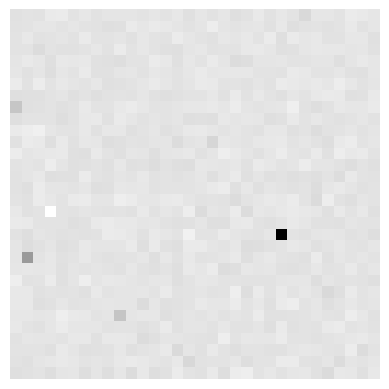

In [16]:
import matplotlib.pyplot as plt
plt.imshow(gpt['reshaped_embeddings'][10], cmap='gray')  # Assuming grayscale image
plt.axis('off')  # Hide axes
plt.show()

In [20]:
import matplotlib.pyplot as plt

for i in range(len(gpt['reshaped_embeddings'])):
    plt.imshow(gpt['reshaped_embeddings'][i], cmap='gray')  # Assuming grayscale image
    plt.axis('off')  # Hide axes
    plt.savefig('/home/csgrad/sunilruf/detect_llm/sunil_code/output/GPT/'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    plt.close()


In [21]:
human['embeddings'] = human['Generation'].apply(generate_bert_embeddings)
human['normalized_embeddings'] = human['embeddings'].apply(min_max_normalize)
human['reshaped_embeddings'] = human['normalized_embeddings'].apply(reshape_embeddings)

In [22]:
import matplotlib.pyplot as plt

for i in range(len(human['reshaped_embeddings'])):
    plt.imshow(human['reshaped_embeddings'][i], cmap='gray')  # Assuming grayscale image
    plt.axis('off')  # Hide axes
    plt.savefig('/home/csgrad/sunilruf/detect_llm/sunil_code/output/Human/'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    plt.close()
